<center><h1><font style="color:red;">ASSIGNMENT </font></h1><br></center>
<h3>

* Name : Achal Rajesh Mate
* Roll No : 2203541
* Enroll No : MITU20BTCSD001
* Branch : CSE
* Class : TY CSE Is - 3
* Guided By : Prof Nagesh Jadhav Sir

<h3><font style="color:red;">Title:- </font>
  : Implement CNN for MNIST/CIFAR10 dataset using tensorflow
</h3>

<h3><font style="color:red;">Objectives:- </font><br>
1. To learn basics of deep learning<br>
2. To learn and implement CNN
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

### Deep Learning
* Deep learning is an artificial intelligence function that imitates the workings of the human brain in processing data and creating patterns for use in decision making. 
* Deep learning is a subset of machine learning in artificial intelligence (AI) that has networks capable of learning unsupervised from data that is unstructured or unlabeled. 
* Also known as deep neural learning or deep neural network.
* Deep learning, a subset of machine learning, utilizes a hierarchical level of artificial neural networks to carry out the process of machine learning. 
* The artificial neural networks are built like the human brain, with neuron nodes connected together like a web. 
* ile traditional programs build analysis with data in a linear way, the hierarchical function of deep learning systems enables machines to process data with a nonlinear approach.

### CNN Architecture







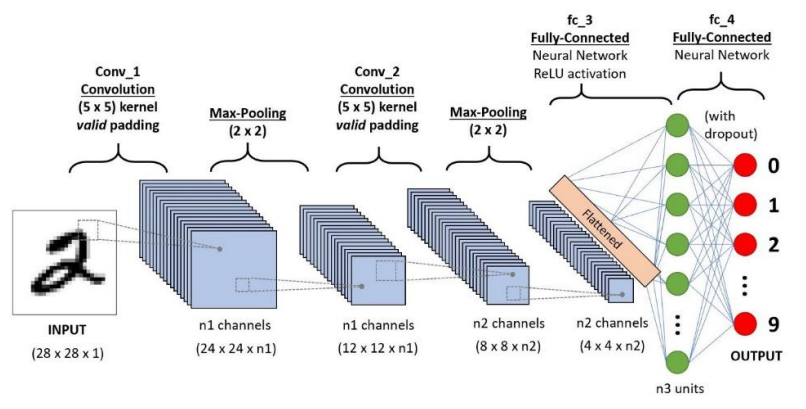

### CNN WORKING
A Convolutional Neural Networks Introduction so to speak.
#### * Step 1: Convolution Operation :-
The first building block in our plan of attack is convolution operation. In this step, 
we will touch on feature detectors, which basically serve as the neural network's 
filters. We will also discuss feature maps, learning the parameters of such maps, 
how patterns are detected, the layers of detection, and how the findings are 
mapped out.
#### * Step 1(b): ReLU Layer :-
The second part of this step will involve the Rectified Linear Unit or ReLU. We 
will cover ReLU layers and explore how linearity functions in the context of 
Convolutional Neural Networks.
Not necessary for understanding CNN's, but there's no harm in a quick lesson to 
improve your skills.
#### * Step 2: Pooling :-
In this part, we'll cover pooling and will get to understand exactly how it 
generally works. Our nexus here, however, will be a specific type of pooling; max 
pooling. We'll cover various approaches, though, including mean (or sum) 
pooling. This part will end with a demonstration made using a visual interactive 
tool that will definitely sort the whole concept out for you.
#### * Step 3: Flattening :-
This will be a brief breakdown of the flattening process and how we move from 
pooled to flattened layers when working with Convolutional Neural Networks.
#### * Step 4: Full Connection :-
In this part, everything that we covered throughout the section will be merged 
together. By learning this, you'll get to envision a fuller picture of how 
Convolutional Neural Networks operate and how the "neurons" that are finally 
produced learn the classification of images.


### Import All Necessary Files

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf
import cv2 as cv
from google.colab.patches import cv2_imshow

### Read the Dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Display Dimensions of training and testing data

In [ ]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

In [ ]:
sns.countplot(y_train)

In [ ]:
x_train

### Display any one image

In [ ]:
plt.imshow(x_train[200], cmap='gray')
plt.show()
print("Digit in image is ",y_train[200])

In [ ]:
input_shape = (28,28,1)

### View Dimension of image

In [ ]:
x_train[200].shape

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [ ]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 5

### Converts a class vector (integers) to binary class matrix

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes) .
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# layer instances to the constructor:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
batch_size = 130
num_classes = 10
epochs = 10

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
print(history.history)

### View Model Performace

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

### Plot Confusion Matrix

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow


### Read new image for testing

In [ ]:
img = cv.imread('five.jfif')
cv2_imshow(img)

### View Dimension of image

In [ ]:
img.shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Convert image into black grey

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
gray.shape

### Change dimension of image

In [ ]:
img_rs = cv.resize(gray, (28, 28))

In [ ]:
img_rs.shape

### Display the image

In [ ]:
cv2_imshow(img_rs)

In [ ]:
img_rs = np.expand_dims(img_rs,0)

In [ ]:
img_rs.shape

In [ ]:
img_rs = np.expand_dims(img_rs,-1)

In [ ]:
img_rs.shape

### make prediction

In [ ]:
num = model.predict(img_rs)
num

In [ ]:
rs = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
from numpy.core.fromnumeric import argmax
result = rs[argmax(num)]

In [ ]:
result

In [ ]:
model.save('mnist.h5')

In [ ]:
model = load_model('mnist.h5')

In [ ]:
model.summary()

### Conclusion
#### Thus I have learn basics of deep learning and Successfully  implement CNN